In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


def preprocess_text(text):
    # Télécharger les ressources NLTK nécessaires
    nltk.download("punkt")
    nltk.download("stopwords")
    nltk.download("wordnet")

    # Convertir en minuscules
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Retirer les stopwords et la ponctuation
    stop_words = set(stopwords.words("french"))
    tokens = [token for token in tokens if token.isalnum() and token not in stop_words]

    # Lemmatisation
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return " ".join(tokens)

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


def apply_topic_modeling(preprocessed_texts, n_topics=5):
    # Créer une matrice document-terme
    vectorizer = CountVectorizer(max_features=1000)
    doc_term_matrix = vectorizer.fit_transform(preprocessed_texts)

    # Appliquer LDA
    lda_model = LatentDirichletAllocation(
        n_components=n_topics, random_state=42, max_iter=50
    )
    lda_output = lda_model.fit_transform(doc_term_matrix)

    # Récupérer les mots les plus importants pour chaque topic
    feature_names = vectorizer.get_feature_names_out()

    return lda_model, lda_output, feature_names

In [3]:
def print_topics(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[: -n_top_words - 1 : -1]
        top_words = [feature_names[i] for i in top_words_idx]
        print(f"Topic {topic_idx + 1}:")
        print(", ".join(top_words))
        print()

In [5]:
# Liste des transcriptions
transcriptions = [
    "Je suis allé au marché ce matin pour acheter des fruits et légumes",
    "La réunion d'équipe s'est bien passée aujourd'hui",
    "Le projet avance selon les délais prévus",
]

# Prétraitement
preprocessed_texts = [preprocess_text(text) for text in transcriptions]

# Application du topic modeling
lda_model, lda_output, feature_names = apply_topic_modeling(preprocessed_texts)

# Affichage des résultats
print_topics(lda_model, feature_names)

Topic 1:
réunion, passée, bien, selon, projet, prévus, avance, délais, matin, marché

Topic 2:
selon, prévus, projet, délais, avance, réunion, bien, passée, matin, marché

Topic 3:
matin, allé, acheter, fruit, légumes, marché, réunion, bien, passée, selon

Topic 4:
réunion, passée, bien, selon, projet, prévus, avance, délais, matin, marché

Topic 5:
réunion, passée, bien, selon, projet, prévus, avance, délais, matin, marché



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\beranger\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\beranger\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\beranger\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\beranger\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\beranger\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\beranger\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk

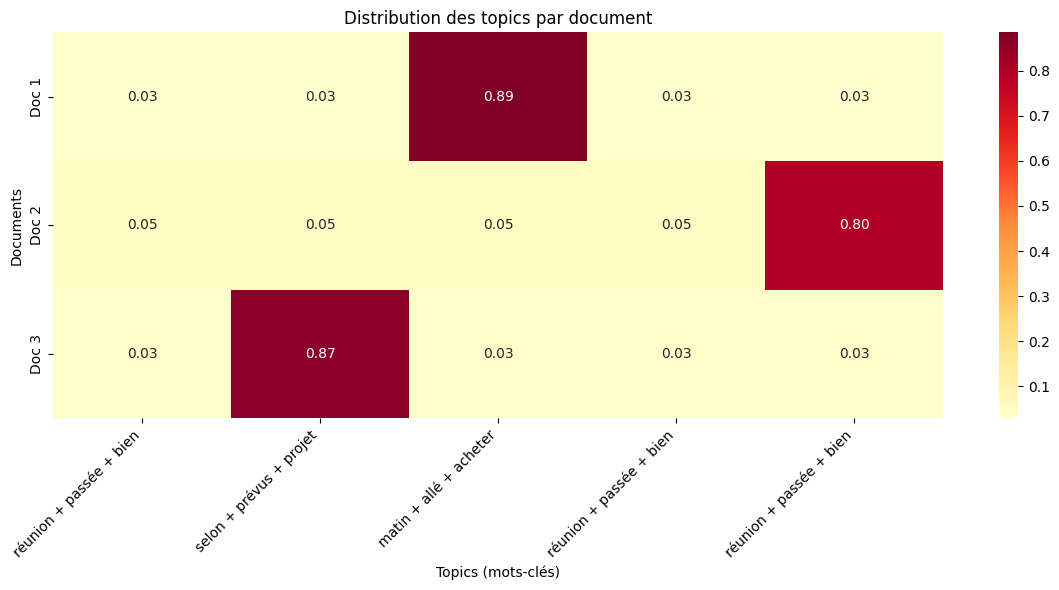

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Créer des labels plus descriptifs pour les topics
topic_labels = []
for topic_idx, topic in enumerate(lda_model.components_):
    top_words_idx = topic.argsort()[-3:][::-1]  # Prendre les 3 mots les plus importants
    top_words = [feature_names[i] for i in top_words_idx]
    topic_labels.append(" + ".join(top_words))

# Créer une heatmap des topics par document
plt.figure(figsize=(12, 6))
sns.heatmap(
    lda_output,
    annot=True,
    fmt=".2f",
    cmap="YlOrRd",
    xticklabels=topic_labels,
    yticklabels=["Doc 1", "Doc 2", "Doc 3"],
)
plt.title("Distribution des topics par document")
plt.xlabel("Topics (mots-clés)")
plt.ylabel("Documents")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()